In [1]:
import os
import pandas as pd
import numpy as np

data_6dfb = pd.read_csv('../datasets/6dfb/SDFB_people.csv')
data_6dfb.columns

Index(['SDFB Person ID', 'ODNB ID', 'Display Name', 'Prefix', 'First Name',
       'Last Name', 'Suffix', 'Title', 'All Search Names', 'Gender',
       'Historical Significance', 'Birth Year Type', 'Extant Birth Year',
       'Alternate Birth Year', 'Death Year Type', 'Extant Death Year',
       'Alternate Death Year', 'Group List'],
      dtype='object')

In [2]:
from collections import Counter

def count_not_nan(array):
    return sum(int(type(i) == str) for i in array)

count_not_nan(data_6dfb.Suffix), count_not_nan(data_6dfb.Title)

(374, 172)

In [3]:
data_6dfb.Gender.value_counts()

male      12706
female     3093
other         2
Name: Gender, dtype: int64

In [4]:
data_6dfb['Historical Significance'].value_counts()

Church of England clergyman                                                             408
politician                                                                              335
judge                                                                                   230
poet                                                                                    210
physician                                                                               195
clergyman and ejected minister                                                          154
army officer                                                                            143
naval officer                                                                           129
nobleman                                                                                112
Jesuit                                                                                  106
college head                                                                    

In [5]:
signs = data_6dfb['Historical Significance'].value_counts()

In [6]:
[i for i in signs.index if signs.loc[i] < 57 and signs.loc[i] > 20]

['diplomat',
 'soldier',
 'composer',
 'magnate',
 'Independent minister',
 'parliamentarian army officer',
 'noblewoman',
 'author',
 'landowner',
 'mathematician',
 'portrait painter',
 'Church of England clergyman and religious controversialist',
 'actor',
 'judge and politician',
 'painter',
 'civil lawyer',
 'bookseller',
 'conspirator',
 'nonconformist minister',
 'army officer and politician',
 'religious writer',
 'organist and composer',
 'religious controversialist',
 'theologian',
 'printer and bookseller',
 'engraver',
 'merchant and politician',
 'Church of England clergyman and religious writer',
 'historian',
 'Latin poet',
 'poet and playwright',
 'Church of England clergyman and writer',
 'Church of England clergyman and poet',
 'Salem witches and their accusers',
 'politician and regicide',
 'surgeon',
 'botanist',
 'schoolmaster',
 'Quaker preacher',
 'herald']

In [7]:
import re
def get_submatrix():
    cat_words = [
    # священники
    ['clergyman', 'priest', 'monk', 'jesuit', 'bishop', 'administrator', 'theologian', 'archbishop',
    'religious', 'missionary', 'preacher'],
    # госслужащие
    ['politician', 'minister', 'diplomat', 'mayor', 'judge', 'lawyer', 'head', 'diplomatist', 'manager',
    'governor', 'secretary', 'government'],
    # знать
    ['queen', 'king', 'prince', 'duke', 'nobleman', 'noblewoman', 'count', 'landowner', 'courtier'],
    # торговцы, капиталисты
    ['merchant', 'financier', 'manufacturer', 'bookseller', 'magnate', 'benefactor', 'antiquary', 'printer',
    'businesswoman', 'businessman', 'publisher'],
    # военные и т.п.
    ['officer', 'soldier', 'captain', 'explorer', 'conspirator', 'commander', 'navigator'],
    # люди творческих профессий
    ['painter', 'tutor', 'writer', 'composer', 'poet', 'philosopher', 'actor', 'author', 'playwright', 'musician',
    'singer', 'orientalist', 'engraver', 'actress'],
    # люди технических профессий
    ['surgeon', 'mathematician', 'scholar', 'historian', 'acrhitect', 'engineer', 'translator', 'anatomist',
     'saddler', 'physician', 'architect']
    ]
    ans = np.zeros((len(data_6dfb), len(cat_words)))
    found_cnt = 0
    notfound = []
    for i, sign in enumerate(data_6dfb['Historical Significance']):
        try:
            tokens = re.split(', | ', sign.lower())
        except:
            continue
        flag = False
        for j, cur_cat_words in enumerate(cat_words):
            for word in tokens:
                if word.lower() in cur_cat_words:
                    ans[i][j] = 1
                    flag = True
        if not flag:
            notfound.append(sign)
        else:
            found_cnt += 1
    print(found_cnt, 'found')
    print(len(notfound), 'not found')
    print(len(data_6dfb) - found_cnt - len(notfound), 'nan')
    print(pd.Series(notfound).value_counts().head(n=10))
    return ans

submatrix = get_submatrix()

10669 found
2186 not found
2946 nan
Salem witches and their accusers                                    22
botanist                                                            22
schoolmaster                                                        22
herald                                                              21
headmaster                                                          19
Franciscan friar                                                    18
sculptor                                                            17
chieftain                                                           16
EGR Taylor, Mathematical Practitioners of Tudor & Stuart England    15
pirate                                                              15
dtype: int64


In [8]:
Counter(list(submatrix.sum(axis=1)))

Counter({0.0: 5132, 1.0: 8335, 2.0: 2282, 3.0: 51, 4.0: 1})

In [9]:
import seaborn as sns
sns.heatmap(pd.DataFrame(submatrix).corr())

/usr/local/lib/python3.6/dist-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


In [10]:
submatrix.mean(axis=0)

array([0.19055756, 0.19011455, 0.05081957, 0.06759066, 0.08005822,
       0.16707803, 0.08005822])

In [11]:
def parse_year(array):
    ans = []
    for i in array:
        try:
            val = int(i[-4:])
        except:
            val = int(i[:4])
        ans.append(val)
    return np.array(ans)
    
birth_year = parse_year(data_6dfb['Extant Birth Year'])

(array([ 260.,  723., 1024., 1477., 1805., 2468., 2615., 2302., 1979.,
        1148.]),
 array([1389. , 1421.6, 1454.2, 1486.8, 1519.4, 1552. , 1584.6, 1617.2,
        1649.8, 1682.4, 1715. ]),
 <a list of 10 Patch objects>)

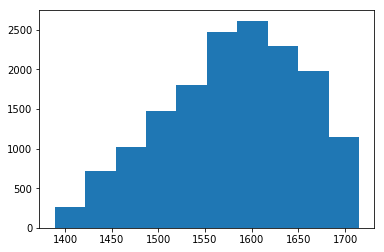

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(birth_year)

(array([ 595., 1469., 1706., 2276., 2245., 2653., 2166., 1769.,  880.,
          42.]),
 array([1500. , 1531.6, 1563.2, 1594.8, 1626.4, 1658. , 1689.6, 1721.2,
        1752.8, 1784.4, 1816. ]),
 <a list of 10 Patch objects>)

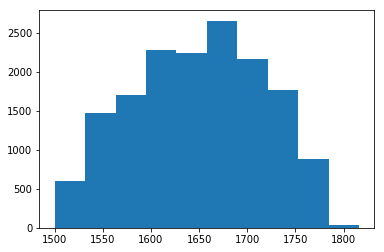

In [13]:
death_year = parse_year(data_6dfb['Extant Death Year'])
plt.hist(death_year)

In [14]:
def check_nans(array):
    return np.array([int(type(i) == str) for i in array])


def parse_gender(array):
    ans = []
    for i in array:
        if i == 'male':
            ans.append(1)
        elif i == 'female':
            ans.append(0)
        else:
            ans.append(0.5)
    return np.array(ans)


has_title = check_nans(data_6dfb.Title)
has_suffix = check_nans(data_6dfb.Suffix)
gender = parse_gender(data_6dfb.Gender)

columns = [has_title, has_suffix, gender, birth_year, death_year]
for i in range(submatrix.shape[1]):
    columns.append(submatrix[:, i])
n_col = len(columns)
matrix = np.vstack(columns)
matrix = (matrix - matrix.mean(axis=1).reshape(n_col, -1)) / matrix.std(axis=1).reshape(n_col, -1)
matrix = matrix.T

In [15]:
matrix.shape

(15801, 12)

In [16]:
matrix += np.random.randn(*matrix.shape) * 1e-4
matrix[:, -submatrix.shape[1]:] /= 3.

In [17]:
matrix.mean(axis=0)

array([-6.93791817e-07,  4.86803144e-07,  2.51751807e-08, -1.73253402e-07,
        3.48064033e-07,  4.07821468e-07,  2.28851689e-07, -2.01897553e-07,
        3.26729562e-07, -3.40537827e-08,  5.14502978e-07, -6.40438632e-08])

In [18]:
matrix.std(axis=0)

array([1.00000004, 0.99999978, 1.00000068, 0.9999997 , 1.00000138,
       0.33333325, 0.33333324, 0.33333359, 0.33333361, 0.33333348,
       0.33333332, 0.33333323])

In [19]:
with open("../datasets/6dfb_mat", "w") as f:
    for row in matrix:
        for elem in row:
            print("%.8f" % elem, end=' ', file=f)
        print(file=f)